# Reference URL

[遺伝的アルゴリズム（Genetic Algorithm）を始めよう！](https://www.slideshare.net/kzokm/genetic-algorithm-41617242)  
[進化計算ライブラリDEAPで実数値GA](https://qiita.com/tyoshitake/items/e76f6f8e4110731606bc)  

In [51]:
import array
import numpy as np
import random
from deap import base, creator, tools, algorithms
from deap.benchmarks import ackley, rastrigin
import matplotlib.pyplot as plt

# In case of Real number encoding GA

In [52]:
#適応度の目標と個体のタイプを指定
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) #-1.0で最小値を求める
creator.create("Individual", np.ndarray, fitness=creator.FitnessMin)

In [53]:
#ツールボックスの作成
toolbox = base.Toolbox()

#遺伝子の数
n_gene = 2

#初期遺伝子の指定
toolbox.register("attr_float", random.uniform, -500, 500)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=n_gene)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

#オペレーターの指定
toolbox.register("evaluate", rastrigin) #ベンチマークとして使用される評価関数を使用（https://en.wikipedia.org/wiki/Rastrigin_function）
toolbox.register("mate", tools.cxBlend, alpha=0.05)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

#保存する統計値の指定
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

最適解 [0. 0.]


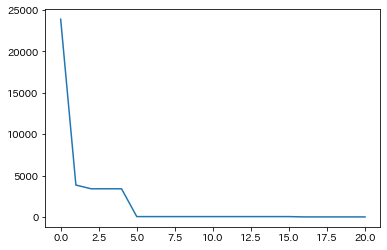

In [54]:
#パラーメーター
pop_size = 10
max_gen = 20
cxpb=0.5
mutpb=0.2
random.seed(12345)

#初期遺伝子の生成
pop = toolbox.population(n=pop_size)
hof = tools.HallOfFame(1, similar=np.array_equal) #最終的によさげな解を格納する

#遺伝的アルゴリズムの実行
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=max_gen, 
                               stats=stats, halloffame=hof, verbose=False)

#最適解の出力
print("最適解", [v for v in hof][0])

#学習曲線のプロット
plt.plot(log.select("gen"), log.select("min"))
plt.show()

## how to set Initial gene 

In [55]:
#初期遺伝子の生成
n_gene = 2
pop_size = 10

#要素がすべて「0」のpopを生成
init_ind = tools.initRepeat(creator.Individual, toolbox.attr_float, n=n_gene)
init_ind[0] = 0
init_ind[1] = 0
pop = [init_ind for i in range(pop_size)]
pop

[Individual([0., 0.]),
 Individual([0., 0.]),
 Individual([0., 0.]),
 Individual([0., 0.]),
 Individual([0., 0.]),
 Individual([0., 0.]),
 Individual([0., 0.]),
 Individual([0., 0.]),
 Individual([0., 0.]),
 Individual([0., 0.])]

最適解 [0. 0.]


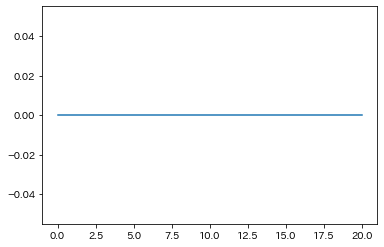

In [56]:
#パラーメーター
max_gen = 20
cxpb=0.5
mutpb=0.2
random.seed(12345)

hof = tools.HallOfFame(1, similar=np.array_equal) #最終的によさげな解を格納する

#遺伝的アルゴリズムの実行
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=max_gen, 
                               stats=stats, halloffame=hof, verbose=False)

#最適解の出力
print("最適解", [v for v in hof][0])

#学習曲線のプロット
plt.plot(log.select("gen"), log.select("min"))
plt.show()

↑#はじめから最適解が[0,0]がセットされているため、学習がはじめから終わっている

# In case of permutation encoding GA

## continual integer number(1,2,3・・) permutation

In [74]:
#orderが1,2,3・・と並んでいれば高評価を受ける関数を作成
def evaluation_function(orders):
    weighted_order = [i*order for i, order in enumerate(orders)]
    return [sum(weighted_order)] #※絶対にリストで返す

In [75]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [76]:
IND_SIZE=20
pop_size=50

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, n=pop_size)

pop = toolbox.population()
#pop

In [77]:
#オペレーターの指定
toolbox.register("evaluate", evaluation_function)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

#保存する統計値の指定
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)


選択可能な交叉
- deap.tools.cxPartialyMatched
- cxUniformPartialyMatched
- cxOrdered

選択可能な突然変異
- mutShuffleIndexes

最適解 [19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 4, 5, 3, 2, 1, 0]


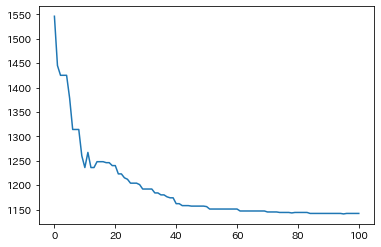

In [78]:
#パラーメーター
max_gen = 100
cxpb=0.5
mutpb=0.2
random.seed(12345)

hof = tools.HallOfFame(1) #最終的によさげな解を格納する

#遺伝的アルゴリズムの実行
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=max_gen, 
                               stats=stats, halloffame=hof, verbose=False)

#最適解の出力
print("最適解", [v for v in hof][0])

#学習曲線のプロット
plt.plot(log.select("gen"), log.select("min"))
plt.show()

## Trip SalesMan Ploblem (TSP)

In [79]:
IND_SIZE = NUMBER_OF_CITIES =100

distances = np.zeros((NUMBER_OF_CITIES, NUMBER_OF_CITIES))
for city in range(NUMBER_OF_CITIES):
    cities = [ i for i in range(NUMBER_OF_CITIES) if not i == city ]
    for to_city in cities:
        distances[to_city][city] = \
            distances[city][to_city] = random.randint(50, 2000)

In [80]:
def EVALUATE(individual):
    summation = 0
    start = individual[0]
    for i in range(1, len(individual)):
        end = individual[i]
        summation += distances[start][end]
        start = end
    return [summation]

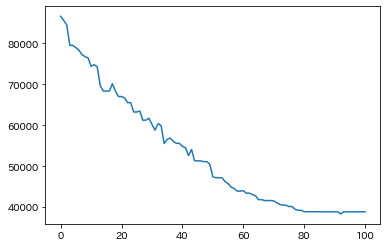

In [85]:
import array
import random
import json
import numpy
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", numpy.ndarray, typecode='i', fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Attribute generator
toolbox.register("indices", random.sample, range(IND_SIZE), IND_SIZE)

# Structure initializers
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", EVALUATE)

random.seed(169)

pop = toolbox.population(n=300)

hof = tools.HallOfFame(1, similar=np.array_equal)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

pop, stats = algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 100, stats=stats, halloffame=hof, verbose=False)

#学習曲線のプロット
plt.plot(stats.select("gen"), stats.select("min"))
plt.show()

# Multi-plocessing execution

[Using Multiple Processors](https://deap.readthedocs.io/en/master/tutorials/basic/part4.html)

※※tips※※  
you should execute python code from .py file when you use multiprocessing in deap

In [87]:
#上記の遺伝的アルゴリズムを実行
!python ParallelGA.py

gen	nevals	avg   	std    	min  	max   
0  	300   	102741	5236.24	86346	120173
1  	216   	100292	5360.72	85465	114634
2  	222   	99337.4	5553.7 	86346	116251
3  	200   	98895.2	6220.38	80726	116332
4  	236   	99515.1	6419.77	80726	116694
5  	231   	98998.9	6092.31	80726	113485
6  	231   	98501.3	6167.53	80726	114576
7  	229   	99160.9	6762.23	80726	117009
8  	227   	99417.9	6437.47	80726	117918
9  	225   	99079.2	6441.48	80726	119950
10 	236   	98615.9	6384.75	79436	117485
11 	248   	99280.6	6234.73	79436	112320
12 	224   	98355.3	5931.03	80726	114455
13 	226   	98733.7	6138.02	80726	114908
14 	226   	99439.9	6338.15	80726	117004
15 	230   	98883.6	6152.49	80726	116634
16 	219   	98206.8	6031.67	79782	118436
17 	228   	98732.2	6184.02	82375	115336
18 	223   	98567  	6268.64	82375	114609
19 	238   	99556.1	6235.26	82375	117504
20 	229   	98715.6	6418.81	82375	118915
21 	222   	98375.2	6603.03	82375	115734
22 	228   	98790.9	6154.03	82375	113397
23 	212   	98995.6	5982.74	81990	112135
24 